### Analysis on London Weather (1979-2020)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
#import plotly.graph_objects as go
import calendar
from Constants import *

%matplotlib inline

In [25]:
df = pd.read_csv('london_weather.csv')
#df = pd.read_csv('DATA_SET_FILE')
#df

In [28]:
df.describe().T

count          mean            std         min   
date              15341.0  1.999567e+07  121217.558277  19790101.0  \
cloud_cover       15322.0  5.268242e+00       2.070072         0.0   
sunshine          15341.0  4.350238e+00       4.028339         0.0   
global_radiation  15322.0  1.187570e+02      88.898272         8.0   
max_temp          15335.0  1.538878e+01       6.554754        -6.2   
mean_temp         15305.0  1.147551e+01       5.729709        -7.6   
min_temp          15339.0  7.559867e+00       5.326756       -11.8   
precipitation     15335.0  1.668634e+00       3.738540         0.0   
pressure          15337.0  1.015366e+05    1049.722604     95960.0   
snow_depth        13900.0  3.798561e-02       0.545633         0.0   

                         25%         50%         75%         max  
date              19890702.0  20000101.0  20100702.0  20201231.0  
cloud_cover              4.0         6.0         7.0         9.0  
sunshine                 0.5         3.5         7.2        16.0  
global_radiation        41.0        95.0       186.0       402.0  
max_temp                10.5        15.0        20.3        37.9  
mean_temp                7.0        11.4        16.0        29.0  
min_temp                 3.5         7.8        11.8        22.3  
precipitation            0.0         0.0         1.6        61.8  
pressure            100920.0    101620.0    102240.0    104820.0  
snow_depth               0.0         0.0         0.0        22.0

In [4]:
df.shape

(15341, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [6]:
df.isna().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

#### Visualising correlation between features

In [7]:
#df.corr()

corrmat = df.corr()

plt.figure(figsize=(8, 7))

hm = sns.heatmap(corrmat,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '.2f',
                 annot_kws = {'size': 10}, 
                 yticklabels = df.columns, 
                 xticklabels = df.columns, 
                 cmap = "Blues"                 
                 )

From our Correlation matrix and Heatmap;
- There's strong correlation between cloud_cover and sunshine.
- There's strong correlation between sunshine and global_radiation.
- There's strong correlation between max_temp and both min_temp and mean_temp, as mean_temp is the average of the two.
- date, precipitation and snow_depth correlates poorly with all other variables

#### Observing trends in data

The following observations can be made;

~

#### Visualising Correlation between selected variable and others

plt.figure(figsize=(8, 7))
selected_column = 'mean_temp'
correlation = df.drop(columns=[selected_column]).apply(lambda x: x.corr(df[selected_column]))
correlation.plot(kind='bar')

In [12]:
# Splitting date column into year, month and day
df1 = df

df1['year'] = df['date'].astype(str).str[:4]
df1['month'] = df['date'].astype(str).str[4:6]
df1['day'] = df['date'].astype(str).str[6:]

In [13]:
df1[['day', 'month', 'year']] = df1[['day', 'month', 'year']].astype(int)

In [14]:
weather_features = df1.select_dtypes(exclude = 'object').columns

In [15]:
for x in weather_features:
    print(x, len(df1[x].unique()))

date 15341
cloud_cover 11
sunshine 160
global_radiation 361
max_temp 375
mean_temp 322
min_temp 297
precipitation 263
pressure 643
snow_depth 20
year 42
month 12
day 31


In [16]:
mean_max = df1['max_temp'].mean()
mean_min = df1['min_temp'].mean()
mean_temp = df1['mean_temp'].mean()
mean_cld = df1['cloud_cover'].median()
mean_glorad = df1['global_radiation'].mean()
mean_prec = df1['precipitation'].mean()
mean_press = df1['pressure'].mean()
#mean_snwdpt = df['snow_depth'].mean()

df1['max_temp'].fillna(mean_max, inplace= True)
df1['min_temp'].fillna(mean_min, inplace= True)
df1['mean_temp'].fillna(mean_temp, inplace= True)
df1['cloud_cover'].fillna(mean_cld, inplace= True)
df1['global_radiation'].fillna(mean_glorad, inplace= True)
df1['precipitation'].fillna(mean_prec, inplace= True)
df1['pressure'].fillna(mean_press, inplace= True)
#df['snow_depth'].fillna(mean_snwdpt, inplace=True)
df1.isna().sum()

date                   0
cloud_cover            0
sunshine               0
global_radiation       0
max_temp               0
mean_temp              0
min_temp               0
precipitation          0
pressure               0
snow_depth          1441
year                   0
month                  0
day                    0
dtype: int64

#### Pie Chart of Temperature Distribution

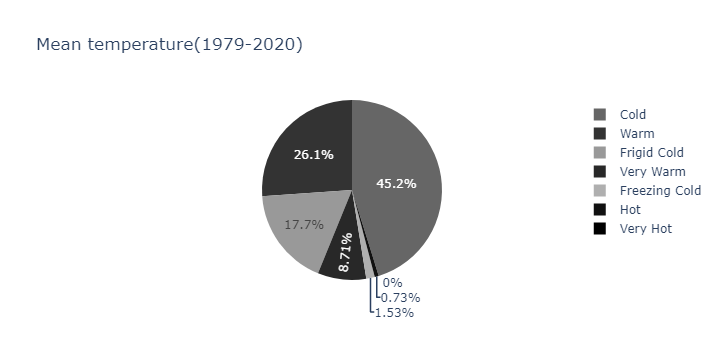

In [17]:
temp_ranges = {'Freezing Cold': (-float('inf'), 0), 'Frigid Cold': (0, 6), 'Cold': (6, 14), 'Warm': (14, 19), 
               'Very Warm': (19, 24), 'Hot': (24, 34), 'Very Hot': (34, float('inf'))}

london_temp = df1.groupby(pd.cut(df['mean_temp'], 
                                bins=[-float('inf')]+[i[1] for i in temp_ranges.values()], 
                                labels=temp_ranges.keys())).size().to_dict()
colors = {'Freezing Cold': '#afafaf', 'Frigid Cold': '#999999', 'Cold': '#666666', 'Warm': '#333333',
          'Very Warm': '#282828', 'Hot': '#111111', 'Very Hot': '#000000'}

fig = go.Figure(data=[go.Pie(labels=list(london_temp.keys()), values=list(london_temp.values()),
                             marker=dict(colors=list(colors.values())))])
fig.update_layout(title='Mean temperature(1979-2020)')
fig.show()


In [18]:
monthly_weather_df = df1.groupby(['year', 'month'], as_index = False)[weather_features].mean()

monthly_weather_df['snow_depth'] = monthly_weather_df.snow_depth.fillna(0)

monthly_weather_df['date'] = pd.to_datetime(monthly_weather_df[['year', 'month']].assign(DAY = 1))

monthly_weather_data = monthly_weather_df.copy()

monthly_weather_data.month = monthly_weather_data['month'].astype(int)
monthly_weather_data['month'] = monthly_weather_data['month'].apply(lambda x: calendar.month_abbr[x])


#### Change in Mean Temperature in London over the Years

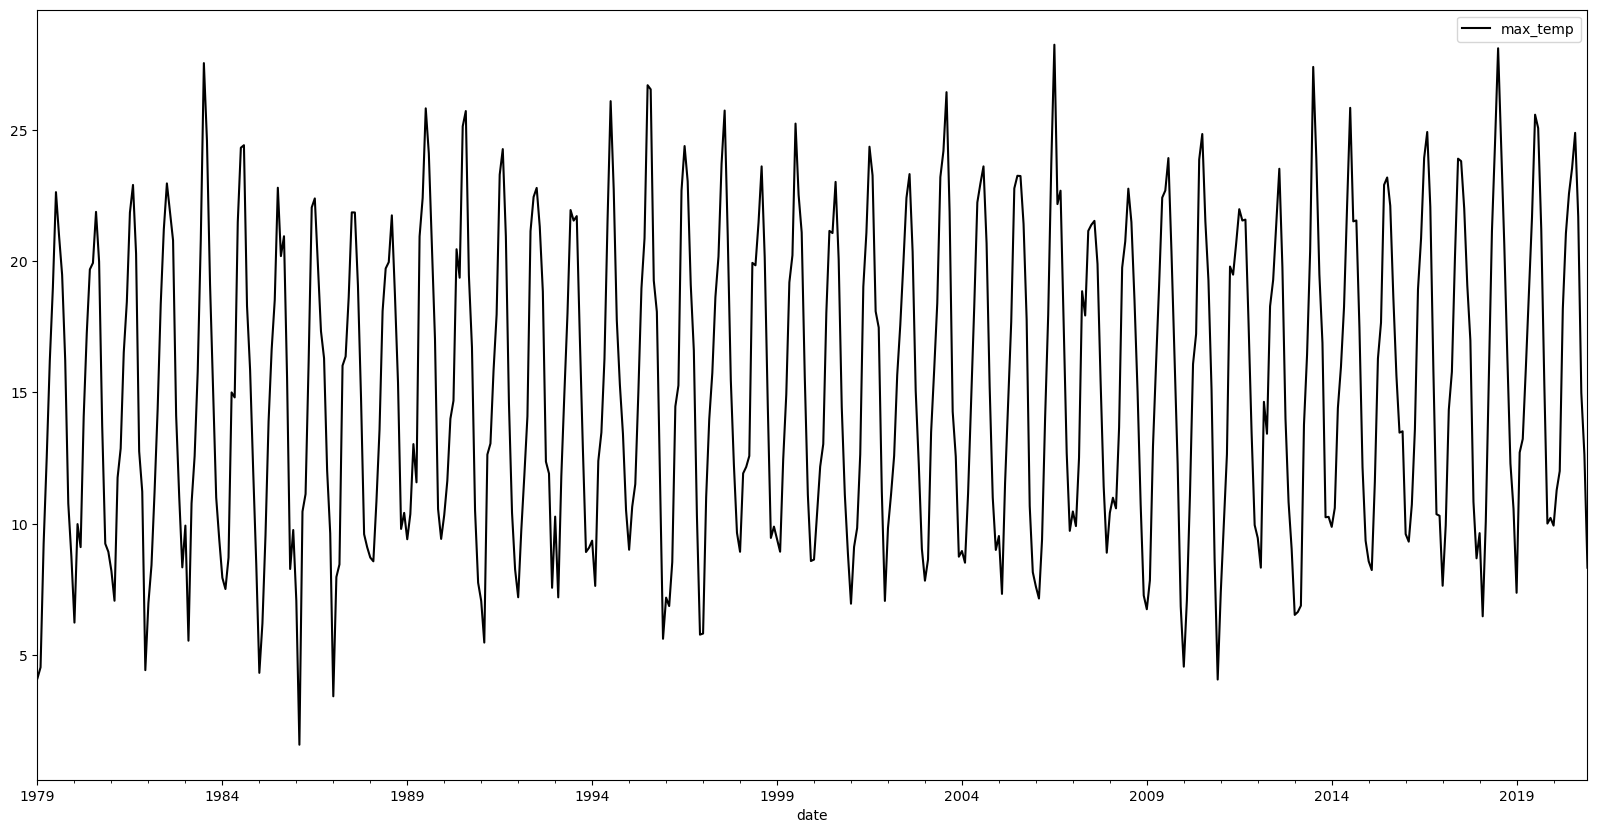

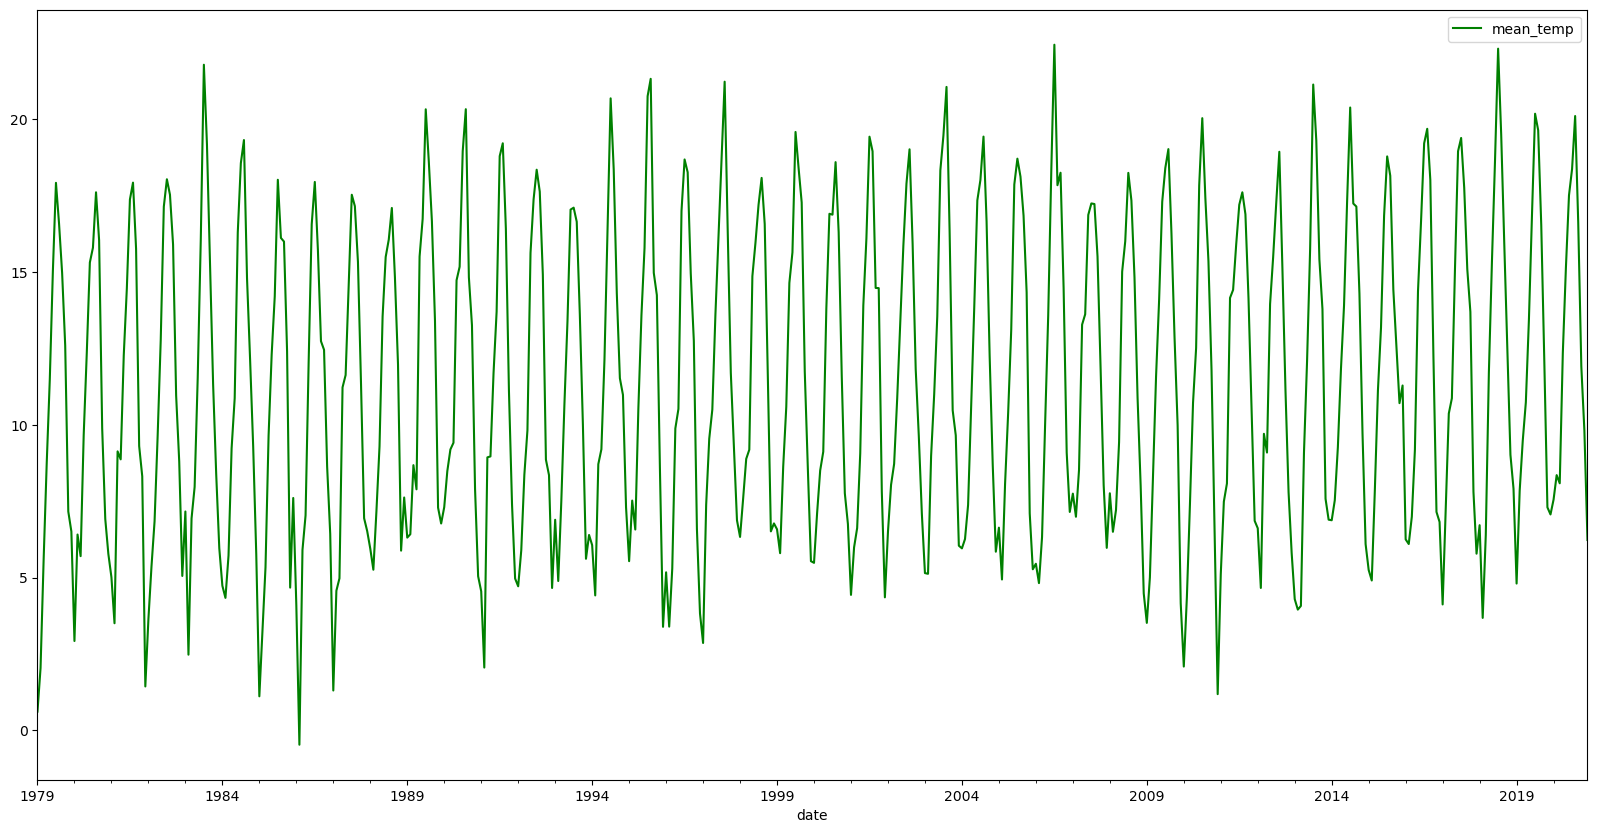

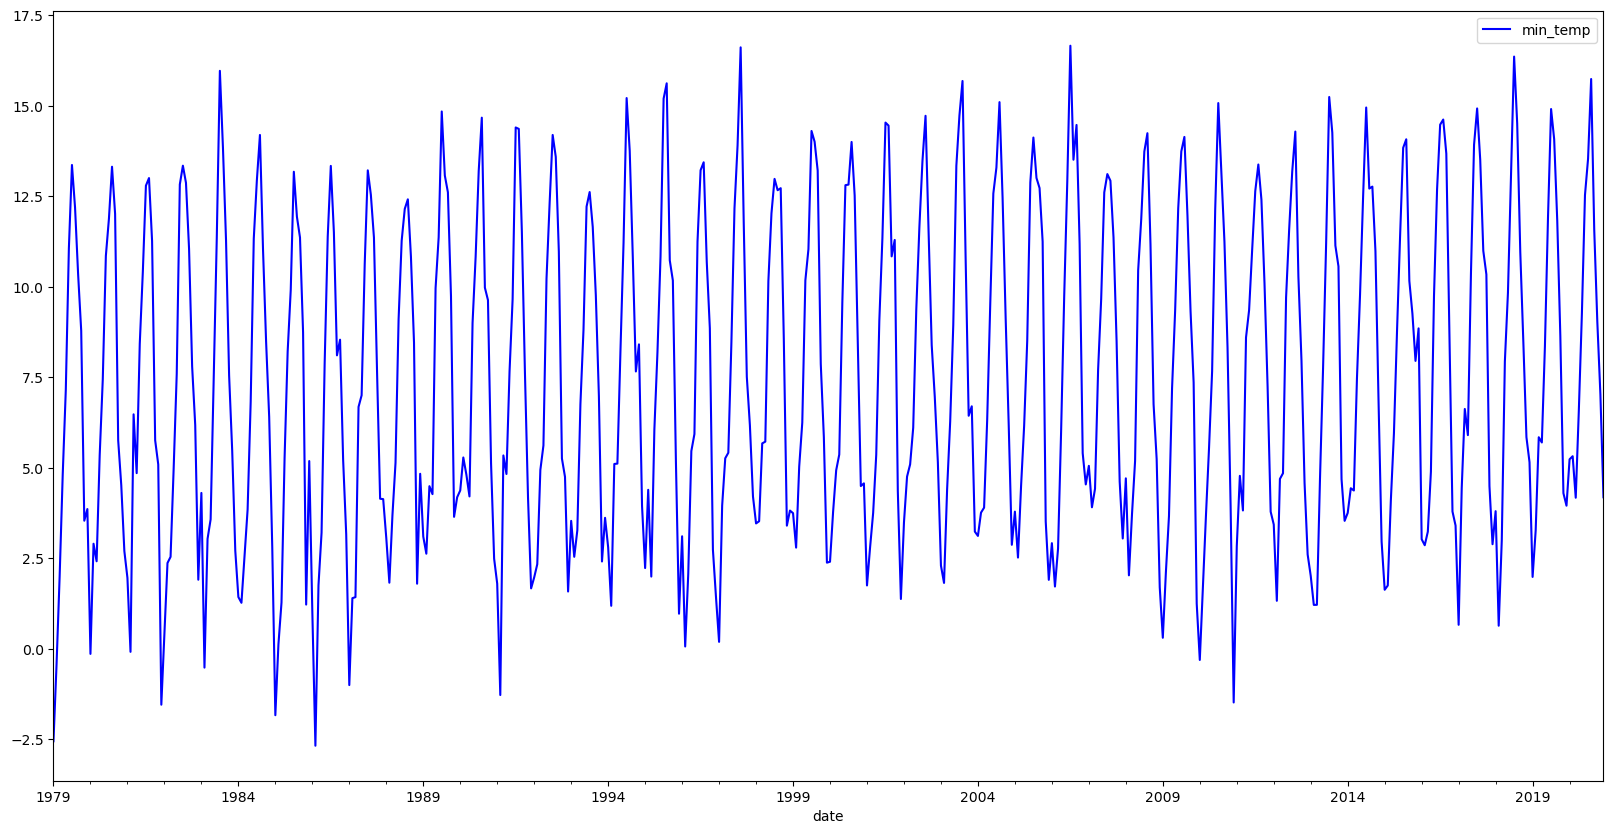

In [19]:
monthly_weather_df.plot(x = 'date', y = ['max_temp'], kind = 'line',color='black', figsize = (20,10))
plt.show()
monthly_weather_df.plot(x = 'date', y = ['mean_temp'], kind = 'line',color='green', figsize = (20,10))
plt.show()
monthly_weather_df.plot(x = 'date', y = ['min_temp'], kind = 'line',color='blue', figsize = (20,10))
plt.show()


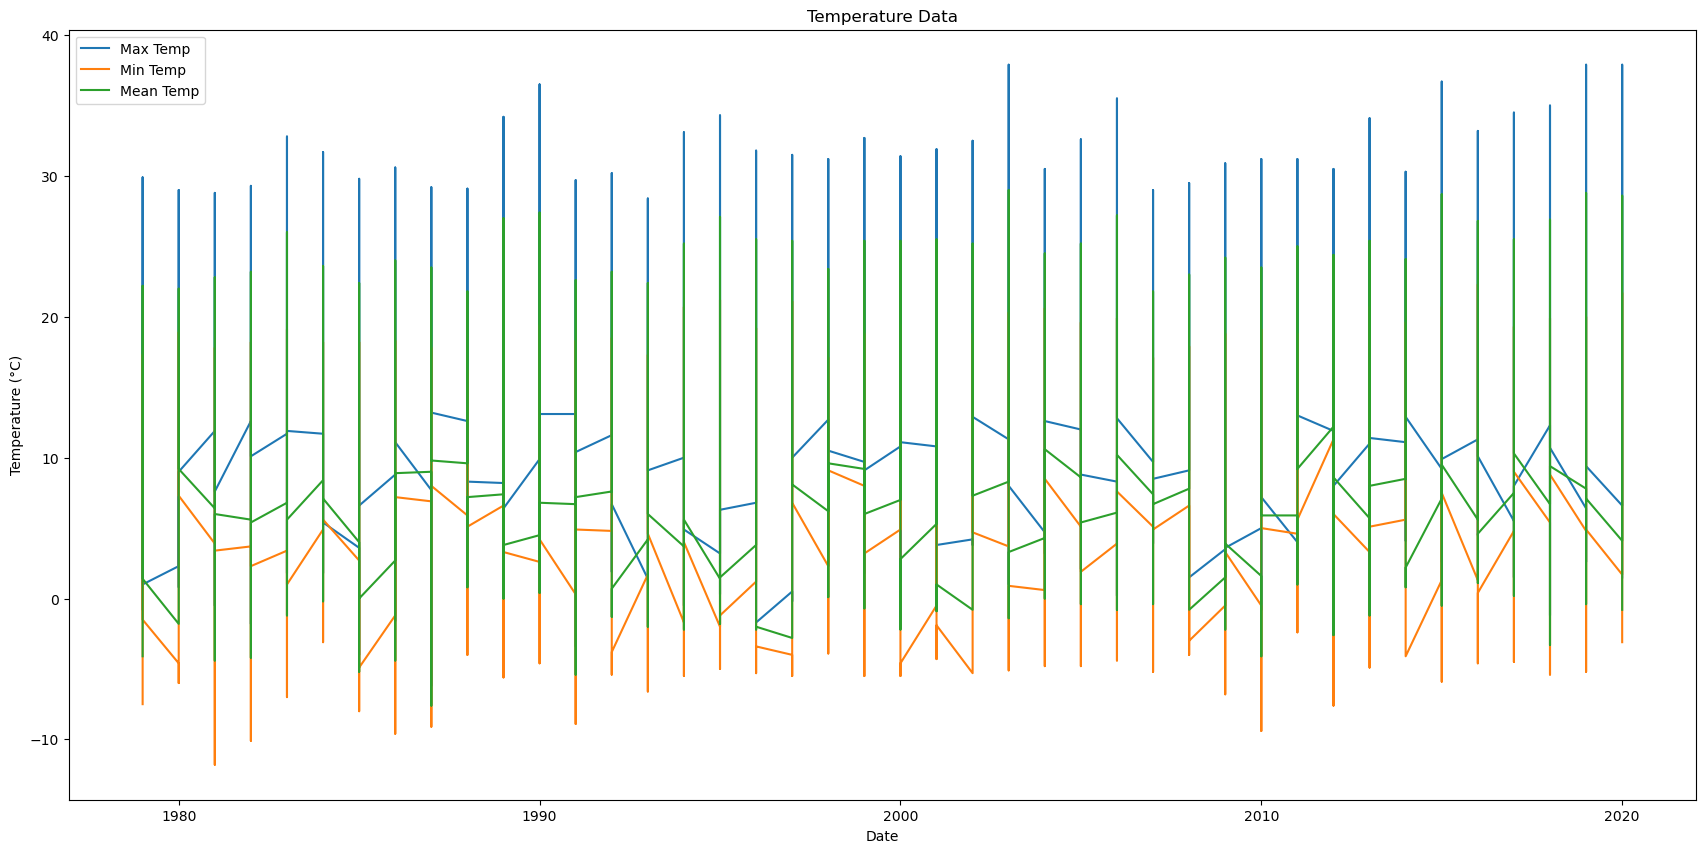

In [20]:
date = df1['year']
max_temp = df1['max_temp']
min_temp = df1['min_temp']
mean_temp = df1['mean_temp']

plt.figure(figsize=(21, 10))
plt.plot(date, max_temp, label='Max Temp')
plt.plot(date, min_temp, label='Min Temp')
plt.plot(date, mean_temp, label='Mean Temp')

plt.title('Temperature Data')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [21]:
yearly_df = monthly_weather_df.groupby(['year'], as_index = False)[['max_temp', 'mean_temp', 'min_temp', 'global_radiation']].mean()

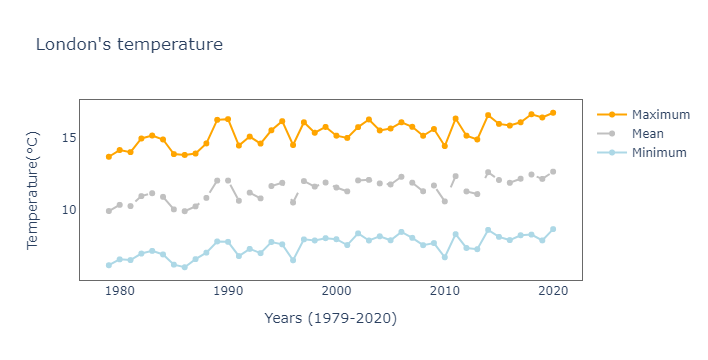

In [62]:
layout = go.Layout(
    title = "London's temperature",
    plot_bgcolor = "#FFF",
    hovermode = "x",
    hoverdistance = 100,
    spikedistance = 1000,
    xaxis=dict(
        title = "Years (1979-2020)",
        linecolor = "dimgray",
        showgrid = False,
        showspikes = True,
        spikethickness = 1,
        spikedash = 'dash',
        spikecolor = 'darkgrey',
        spikemode = 'across',
        mirror = True
    ),
    yaxis=dict(
        title = "Temperature(°C)",  
        linecolor = "dimgray",
        mirror = True
    )
)

plot = go.Figure(data = [ go.Scatter(x = yearly_df.year, y = yearly_df.max_temp, name = 'Maximum',
                                    mode = 'lines+markers', line_color = 'orange'),
                         go.Scatter(x = yearly_df.year, y = yearly_df.mean_temp, name = 'Mean', mode = 'lines+markers',
                                    line = dict(color = 'silver', dash = 'longdash')),
                         go.Scatter(x = yearly_df.year, y = yearly_df.min_temp, name = 'Minimum',
                                    mode = 'lines+markers', line_color = 'lightblue') ],
                 layout = layout)
plot.show()

#### Change in Global Radiation in London over the Years

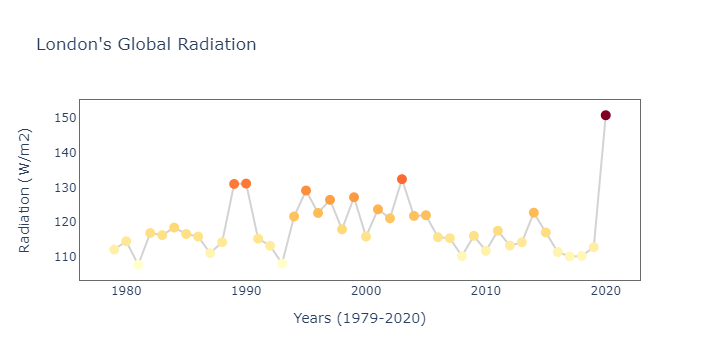

In [23]:
layout = go.Layout(
    title = "London's Global Radiation",
        plot_bgcolor = '#fff',
            hovermode = 'x',
    
    xaxis = dict(
        title = 'Years (1979-2020)',
        linecolor = 'dimgrey',
        showgrid = False,
        showspikes = True,
        spikedash = 'dot',
        spikecolor = 'darkgrey',
        spikemode = 'across',
        spikethickness = 1,
        mirror = True 
        ),
                   
    yaxis = dict(
        title = 'Radiation (W/m2)',
        linecolor = 'dimgrey',
        showgrid = False,
        mirror = True 
        )
    )

plot = go.Figure(data = [go.Scatter(
    x = yearly_df.year,
    y = yearly_df.global_radiation,
    mode = 'lines+markers',
    marker = dict(color = yearly_df.global_radiation, colorscale = 'ylorrd', size = 10),
    line_color = 'lightgrey')],
    layout = layout)
plot.show()

#### Snow depth over the years

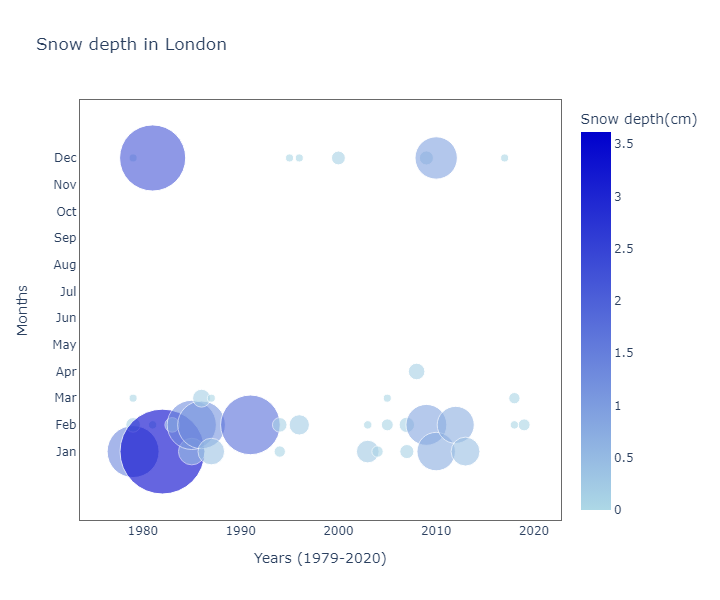

In [24]:
fig = px.scatter(monthly_weather_data, x="year", y="month",
                 color = 'snow_depth', color_continuous_scale=['lightblue', 'mediumblue'],
                 size="snow_depth", size_max=60, opacity = 0.6, title = "Snow depth in London")
fig.update_layout(height = 600, width = 1000, plot_bgcolor = 'white')
fig.update_xaxes(title = 'Years (1979-2020)', showgrid = False, linecolor = 'dimgrey', mirror = True)
fig.update_yaxes(title = 'Months', showgrid = False, zeroline = False, linecolor = 'dimgrey', mirror = True)
fig.update_coloraxes(colorbar = dict(title = 'Snow depth(cm)'))
fig.show()

#### Regression Modelling

In [25]:
df.isnull().sum()

date                   0
cloud_cover            0
sunshine               0
global_radiation       0
max_temp               0
mean_temp              0
min_temp               0
precipitation          0
pressure               0
snow_depth          1441
year                   0
month                  0
day                    0
dtype: int64

In [26]:
df = df.dropna(axis = 0)
df

date  cloud_cover  sunshine  global_radiation  max_temp  ...  pressure  snow_depth  year  month  day
0      19790101          2.0       7.0              52.0       2.3  ...  101900.0         9.0  1979      1    1
1      19790102          6.0       1.7              27.0       1.6  ...  102530.0         8.0  1979      1    2
2      19790103          5.0       0.0              13.0       1.3  ...  102050.0         4.0  1979      1    3
3      19790104          8.0       0.0              13.0      -0.3  ...  100840.0         2.0  1979      1    4
4      19790105          6.0       2.0              29.0       5.6  ...  102250.0         1.0  1979      1    5
...         ...          ...       ...               ...       ...  ...       ...         ...   ...    ...  ...
14970  20191227          8.0       0.0              12.0       9.6  ...  102880.0         0.0  2019     12   27
14971  20191228          8.0       0.0              12.0       9.9  ...  103630.0         0.0  2019     12   28
14972  20191229          6.0       2.2              29.0      11.5  ...  103360.0         0.0  2019     12   29
14973  20191230          0.0       3.6              37.0       9.3  ...  102970.0         0.0  2019     12   30
14974  20191231          7.0       0.0              13.0       9.4  ...  103160.0         0.0  2019     12   31

[13900 rows x 13 columns]

In [27]:
df = df.drop(['date'], axis=1)
df

cloud_cover  sunshine  global_radiation  max_temp  mean_temp  ...  pressure  snow_depth  year  month  day
0              2.0       7.0              52.0       2.3       -4.1  ...  101900.0         9.0  1979      1    1
1              6.0       1.7              27.0       1.6       -2.6  ...  102530.0         8.0  1979      1    2
2              5.0       0.0              13.0       1.3       -2.8  ...  102050.0         4.0  1979      1    3
3              8.0       0.0              13.0      -0.3       -2.6  ...  100840.0         2.0  1979      1    4
4              6.0       2.0              29.0       5.6       -0.8  ...  102250.0         1.0  1979      1    5
...            ...       ...               ...       ...        ...  ...       ...         ...   ...    ...  ...
14970          8.0       0.0              12.0       9.6        7.5  ...  102880.0         0.0  2019     12   27
14971          8.0       0.0              12.0       9.9        8.1  ...  103630.0         0.0  2019     12   28
14972          6.0       2.2              29.0      11.5        8.7  ...  103360.0         0.0  2019     12   29
14973          0.0       3.6              37.0       9.3        6.5  ...  102970.0         0.0  2019     12   30
14974          7.0       0.0              13.0       9.4        7.1  ...  103160.0         0.0  2019     12   31

[13900 rows x 12 columns]

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [70]:
X = df[['sunshine']].values.reshape(-1, 1)
y = df['global_radiation'].values

#X = df[['max_temp', 'mean_temp', 'min_temp', 'sunshine', 'precipitation']].values.reshape(-1, 1)

In [71]:
# Splitting the Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#X_test = scaler.fit_transform(X_test)

In [73]:
model = XGBRegressor()

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [74]:
y_pred = model.predict(X_test)

In [75]:
print("Training Score:", model.score(X_train, y_train))
print("Testing Score:",model.score(X_test, y_test))

Training Score: 0.734026398070897
Testing Score: 0.7160643268558055


- Parameter Tuning is badly needed.
- Dataset must be fined tuned many more times
- Accuracy score must increase

In [ ]:
print("Testing Score:",model.score(X_test, y_test))

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_depth = [int(x) for x in np.linspace(10, 110, num=11)]

max_features = ['auto', 'sqrt']

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

RandomForest = RandomForestRegressor

rf_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf}

modelr = RandomizedSearchCV(estimator = RandomForest(), param_distributions = rf_grid, scoring= 'accuracy', cv = 5, n_iter = 100)

modelr.fit(X_train, y_train)

In [ ]:
print("Testing Score:",model.score(X_test, y_test))

Text(0, 0.5, 'global_radiation')

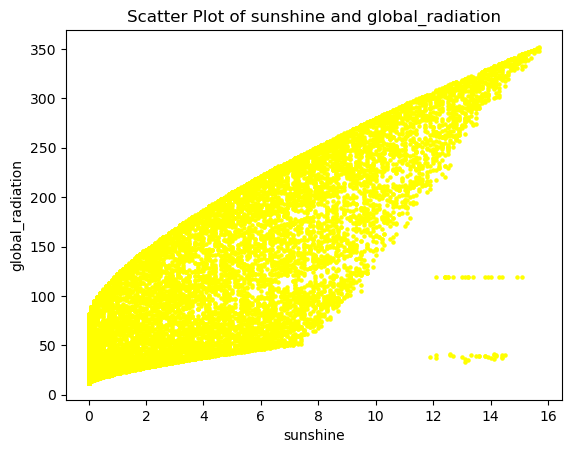

In [54]:
from pandas._libs.tslibs.period import IncompatibleFrequency
sunshine = df["sunshine"]
global_radiation = df["global_radiation"]

plt.title("Scatter Plot of sunshine and global_radiation")
plt.scatter(sunshine,global_radiation, color="yellow", s=5)
plt.xlabel("sunshine")
plt.ylabel("global_radiation")